C:\Users\ssp1_\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


Dataset Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  Jo

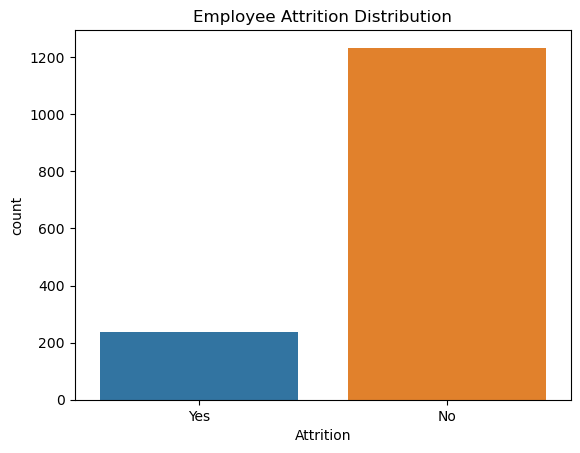


Confusion Matrix:

[[254   1]
 [ 35   4]]

Classification Report:

              precision    recall  f1-score   support

       False       0.88      1.00      0.93       255
        True       0.80      0.10      0.18        39

    accuracy                           0.88       294
   macro avg       0.84      0.55      0.56       294
weighted avg       0.87      0.88      0.83       294


Accuracy Score:

0.8775510204081632


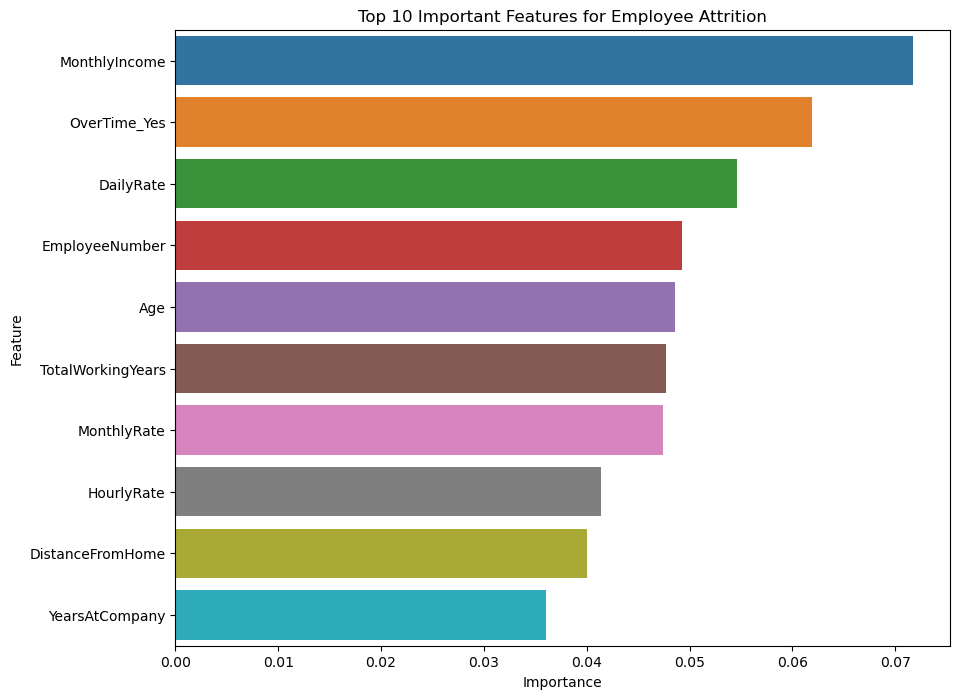

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load the dataset
file_path = r'C:\Users\ssp1_\Downloads\WA_Fn-UseC_-HR-Employee-Attrition.csv'
data = pd.read_csv(file_path)

# Display basic information about the dataset
print("Dataset Information:\n")
print(data.info())
print("\nSummary Statistics:\n")
print(data.describe())
print("\nFirst Few Rows:\n")
print(data.head())

# Check for missing values
print("\nMissing Values:\n")
print(data.isnull().sum())

# Explore the target variable 'Attrition'
sns.countplot(data=data, x='Attrition')
plt.title('Employee Attrition Distribution')
plt.show()

# Convert categorical variables into dummy/indicator variables
data = pd.get_dummies(data, drop_first=True)

# Define the features (X) and target (y)
X = data.drop('Attrition_Yes', axis=1)
y = data['Attrition_Yes']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
print("\nConfusion Matrix:\n")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:\n")
print(accuracy_score(y_test, y_pred))

# Feature Importance
importances = pd.DataFrame({'Feature': X.columns, 'Importance': clf.feature_importances_})
importances = importances.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importances.head(10))
plt.title('Top 10 Important Features for Employee Attrition')
plt.show()
